In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import os

root = "/content/drive/MyDrive/oilspill_dataset/"

# Re-checking for existence before listing, though the issue was likely transient.
if os.path.exists(root):
    print("Folders inside dataset:", os.listdir(root))
else:
    print(f"Error: Directory '{root}' not found. Please ensure it exists and Google Drive is fully mounted.")

Folders inside dataset: ['label_colors.txt', 'val', 'train', 'test']


In [10]:
!ls -R /content/drive/MyDrive/oilspill_dataset

/content/drive/MyDrive/oilspill_dataset:
label_colors.txt  test	train  val

/content/drive/MyDrive/oilspill_dataset/test:
images	masks

/content/drive/MyDrive/oilspill_dataset/test/images:
'Oil (1007).jpg'  'Oil (144).jpg'   'Oil (397).jpg'  'Oil (724).jpg'
'Oil (1019).jpg'  'Oil (145).jpg'   'Oil (404).jpg'  'Oil (744).jpg'
'Oil (1024).jpg'  'Oil (148).jpg'   'Oil (406).jpg'  'Oil (747).jpg'
'Oil (1026).jpg'  'Oil (14).jpg'    'Oil (415).jpg'  'Oil (748).jpg'
'Oil (1037).jpg'  'Oil (161).jpg'   'Oil (420).jpg'  'Oil (749).jpg'
'Oil (1038).jpg'  'Oil (162).jpg'   'Oil (425).jpg'  'Oil (74).jpg'
'Oil (1042).jpg'  'Oil (165).jpg'   'Oil (426).jpg'  'Oil (754).jpg'
'Oil (1044).jpg'  'Oil (166).jpg'   'Oil (429).jpg'  'Oil (755).jpg'
'Oil (1047).jpg'  'Oil (167).jpg'   'Oil (430).jpg'  'Oil (758).jpg'
'Oil (1049).jpg'  'Oil (175).jpg'   'Oil (435).jpg'  'Oil (759).jpg'
'Oil (1050).jpg'  'Oil (177).jpg'   'Oil (438).jpg'  'Oil (761).jpg'
'Oil (1055).jpg'  'Oil (179).jpg'   'Oil (446).jpg'  

In [12]:
import os

splits = ["train", "val", "test"]
root = "/content/drive/MyDrive/oilspill_dataset/"

for split in splits:
    os.makedirs(root + split + "/binary_masks", exist_ok=True)


In [13]:
import numpy as np
from PIL import Image

# oil color
OIL_RGB = (255, 0, 124)

def rgb_to_binary_oil_mask(rgb_img):
    return np.all(rgb_img == np.array(OIL_RGB, dtype=np.uint8), axis=-1).astype(np.uint8)

for split in ["train", "val", "test"]:
    img_dir = root + split + "/images/"
    mask_dir = root + split + "/masks/"
    out_dir = root + split + "/binary_masks/"

    for fname in os.listdir(img_dir):
        if not fname.lower().endswith((".png", ".jpg", ".jpeg", ".tif")):
            continue

        mask_path = mask_dir + os.path.splitext(fname)[0] + ".png"
        out_path = out_dir + os.path.splitext(fname)[0] + ".png"

        # read mask
        rgb = np.array(Image.open(mask_path).convert("RGB"))

        # convert to binary (1 = oil, 0 = background)
        binmask = rgb_to_binary_oil_mask(rgb) * 255

        Image.fromarray(binmask.astype(np.uint8)).save(out_path)

        print(split, "→ converted:", fname)


train → converted: Oil (728).jpg
train → converted: Oil (770).jpg
train → converted: Oil (73).jpg
train → converted: Oil (481).jpg
train → converted: Oil (796).jpg
train → converted: Oil (735).jpg
train → converted: Oil (1107).jpg
train → converted: Oil (678).jpg
train → converted: Oil (297).jpg
train → converted: Oil (992).jpg
train → converted: Oil (769).jpg
train → converted: Oil (1157).jpg
train → converted: Oil (948).jpg
train → converted: Oil (545).jpg
train → converted: Oil (1081).jpg
train → converted: Oil (236).jpg
train → converted: Oil (1073).jpg
train → converted: Oil (107).jpg
train → converted: Oil (872).jpg
train → converted: Oil (225).jpg
train → converted: Oil (92).jpg
train → converted: Oil (994).jpg
train → converted: Oil (989).jpg
train → converted: Oil (621).jpg
train → converted: Oil (726).jpg
train → converted: Oil (266).jpg
train → converted: Oil (519).jpg
train → converted: Oil (722).jpg
train → converted: Oil (76).jpg
train → converted: Oil (1040).jpg
train → 

In [14]:
import cv2

target = (256, 256)

for split in ["train", "val", "test"]:
    in_img = root + split + "/images/"
    in_mask = root + split + "/binary_masks/"
    out_img = root + split + "/resized_images/"
    out_mask = root + split + "/resized_masks/"

    os.makedirs(out_img, exist_ok=True)
    os.makedirs(out_mask, exist_ok=True)

    for fname in os.listdir(in_img):
        img = cv2.imread(in_img + fname, cv2.IMREAD_COLOR)
        mask = cv2.imread(in_mask + os.path.splitext(fname)[0] + ".png", cv2.IMREAD_GRAYSCALE)

        img_r = cv2.resize(img, target, interpolation=cv2.INTER_AREA)
        mask_r = cv2.resize(mask, target, interpolation=cv2.INTER_NEAREST)

        cv2.imwrite(out_img + fname, img_r)
        cv2.imwrite(out_mask + os.path.splitext(fname)[0] + ".png", mask_r)

    print("Done resizing:", split)


Done resizing: train
Done resizing: val
Done resizing: test


In [15]:
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

root = "/content/drive/MyDrive/oilspill_dataset/"

for split in ["train","val","test"]:
    print(split, "images:", os.path.exists(os.path.join(root, split, "resized_images")),
          "masks:", os.path.exists(os.path.join(root, split, "resized_masks")))


train images: True masks: True
val images: True masks: True
test images: True masks: True


Sample file: /content/drive/MyDrive/oilspill_dataset/train/resized_images/Oil (1).jpg
Original pixel range: 6 to 255
Normalized pixel range: 0.023529412 to 1.0


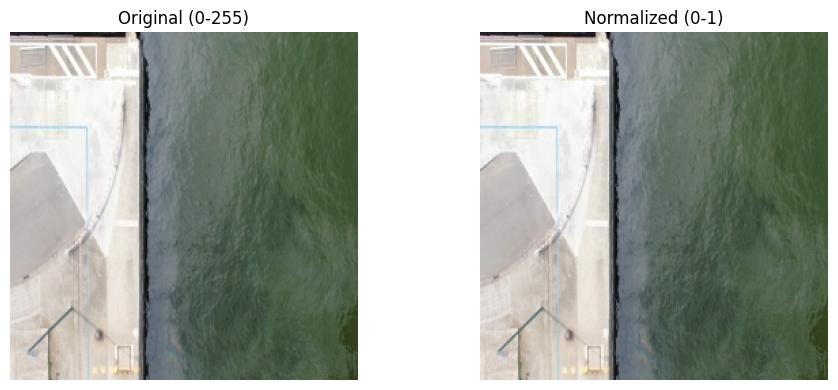

In [17]:
sample_list = sorted(os.listdir(os.path.join(root, "train", "resized_images")))
sample_img_path = os.path.join(root, "train", "resized_images", sample_list[0])

img = np.array(Image.open(sample_img_path).convert("RGB"))
img_norm = img.astype(np.float32) / 255.0

print("Sample file:", sample_img_path)
print("Original pixel range:", img.min(), "to", img.max())
print("Normalized pixel range:", img_norm.min(), "to", img_norm.max())

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img); plt.title("Original (0-255)"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(img_norm); plt.title("Normalized (0-1)"); plt.axis("off")
plt.tight_layout()
plt.show()

Denoising files: ['Oil (1).jpg', 'Oil (10).jpg', 'Oil (100).jpg', 'Oil (1000).jpg', 'Oil (1001).jpg', 'Oil (1002).jpg']


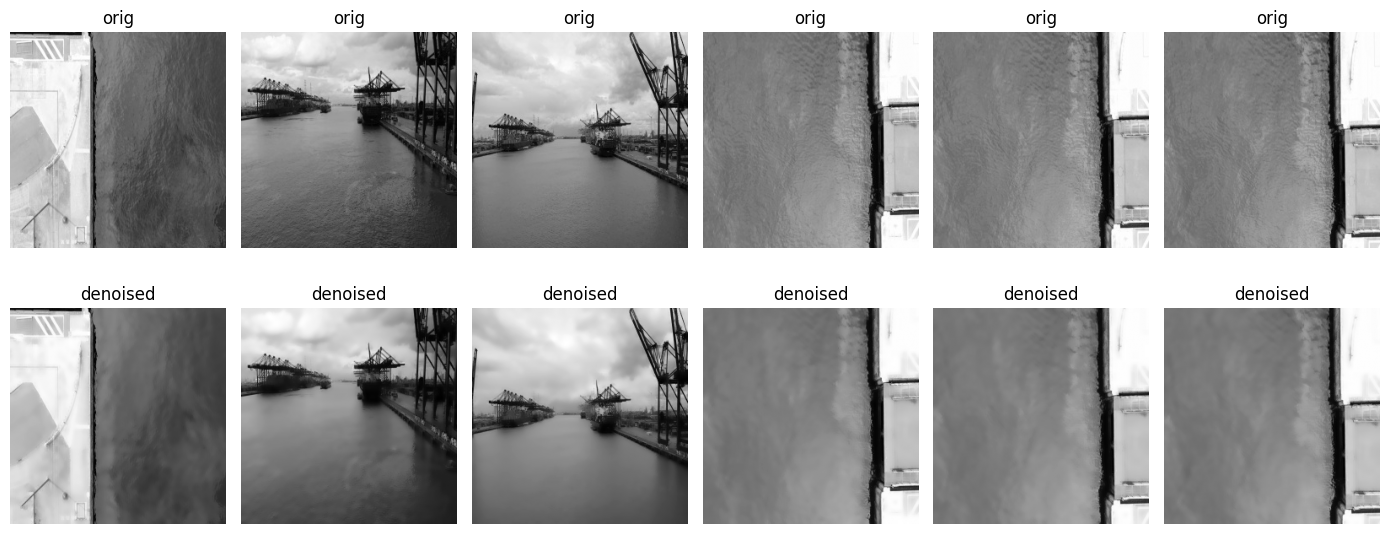

Saved denoised images to: /content/drive/MyDrive/oilspill_dataset/train/denoised_images


In [18]:
def lee_filter(img, size=7):
    img = img.astype(np.float32)
    mean = cv2.blur(img, (size,size))
    sq_mean = cv2.blur(img * img, (size,size))
    var = sq_mean - mean * mean
    overall_var = np.mean(var)
    w = var / (var + overall_var + 1e-8)
    filtered = mean + w * (img - mean)
    return np.clip(filtered, 0, 255).astype(np.uint8)

split = "train"
in_folder = os.path.join(root, split, "resized_images")
out_folder = os.path.join(root, split, "denoised_images")
os.makedirs(out_folder, exist_ok=True)

files = sorted([f for f in os.listdir(in_folder) if f.lower().endswith(('.jpg','.png','.jpeg'))])[:6]
print("Denoising files:", files)

plt.figure(figsize=(14,6))
for i, fname in enumerate(files):
    img_path = os.path.join(in_folder, fname)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    den = lee_filter(img)
    cv2.imwrite(os.path.join(out_folder, fname), den)

    plt.subplot(2,6,i+1); plt.imshow(img, cmap='gray'); plt.title("orig"); plt.axis('off')
    plt.subplot(2,6,6+i+1); plt.imshow(den, cmap='gray'); plt.title("denoised"); plt.axis('off')

plt.tight_layout(); plt.show()
print("Saved denoised images to:", out_folder)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 6.8 MB/s eta 0:00:00


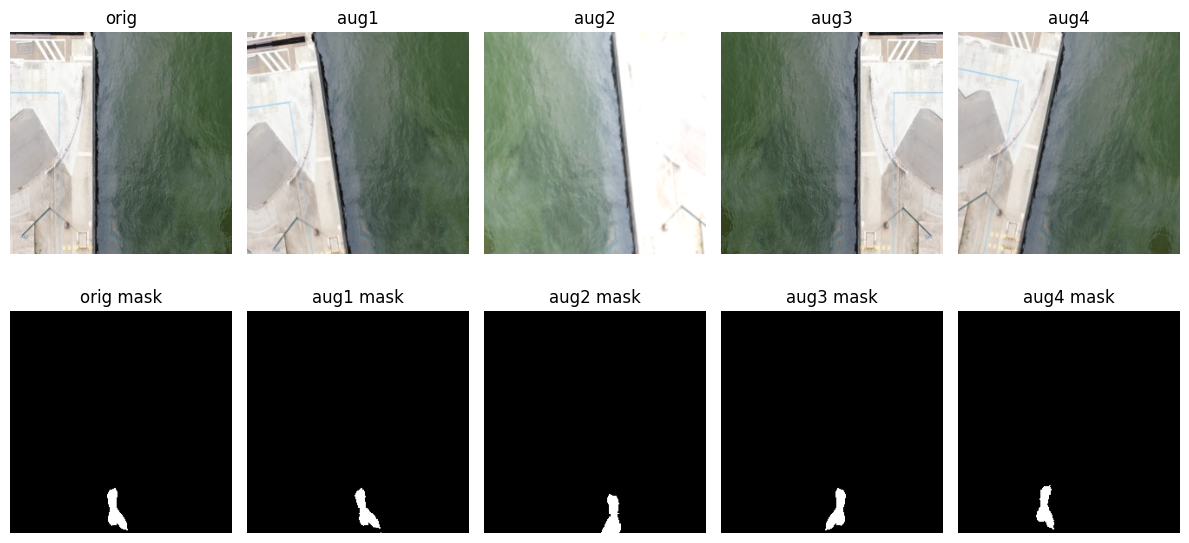

Saved augmentation examples to: /content/drive/MyDrive/oilspill_dataset/train/aug_examples


In [19]:
!pip install -q albumentations==1.3.0

import albumentations as A
import cv2, os
from PIL import Image
import matplotlib.pyplot as plt
root = "/content/drive/MyDrive/oilspill_dataset/"

sample = sorted(os.listdir(os.path.join(root,"train","resized_images")))[0]
img_path = os.path.join(root, "train", "resized_images", sample)
mask_path = os.path.join(root, "train", "resized_masks", os.path.splitext(sample)[0] + ".png")

img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path, 0)

aug = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.7),
    A.Rotate(limit=20, p=0.7),
    A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.15, rotate_limit=10, p=0.6),
], additional_targets={'mask':'mask'})

examples = [("orig", img, mask)]
for i in range(4):
    res = aug(image=img, mask=mask)
    examples.append((f"aug{i+1}", res['image'], res['mask']))

out_dir = os.path.join(root, "train", "aug_examples"); os.makedirs(out_dir, exist_ok=True)
for i,(name,im,msk) in enumerate(examples):
    cv2.imwrite(os.path.join(out_dir, f"{name}_img.png"), cv2.cvtColor(im, cv2.COLOR_RGB2BGR))
    cv2.imwrite(os.path.join(out_dir, f"{name}_mask.png"), msk)

# plot
plt.figure(figsize=(12,6))
for i,(name,im,msk) in enumerate(examples):
    plt.subplot(2,5,i+1); plt.imshow(im); plt.title(name); plt.axis('off')
    plt.subplot(2,5,5+i+1); plt.imshow(msk, cmap='gray'); plt.title(name + " mask"); plt.axis('off')
plt.tight_layout(); plt.show()
print("Saved augmentation examples to:", out_dir)


train: total=811, with_oil=633, without_oil=178, ratio=0.781


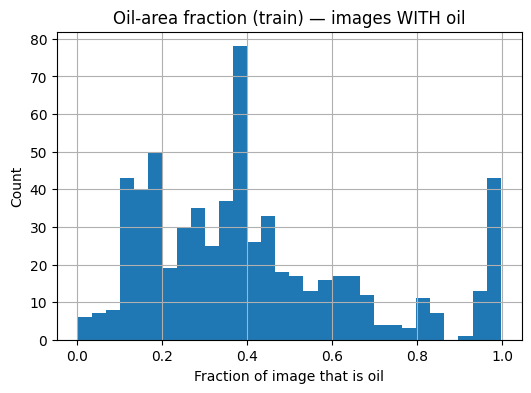

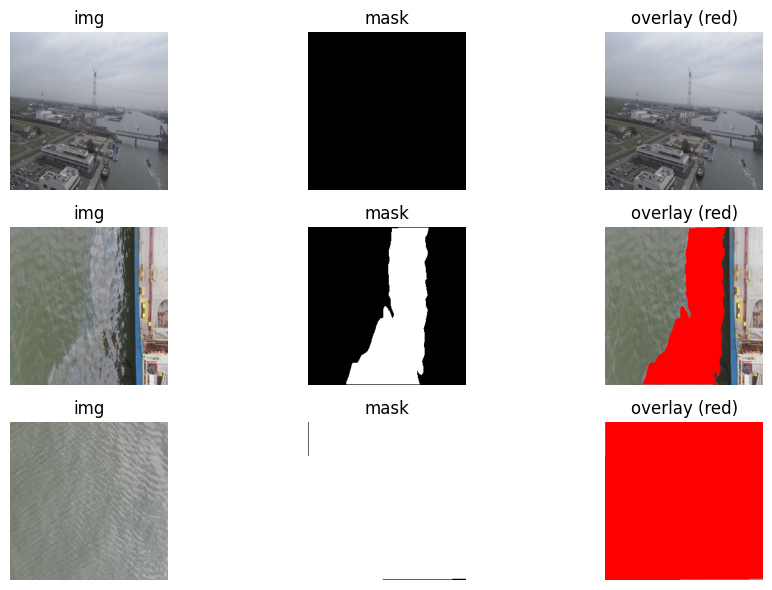

In [20]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
root = "/content/drive/MyDrive/oilspill_dataset/"

split = "train"
mask_dir = os.path.join(root, split, "resized_masks")
img_dir = os.path.join(root, split, "resized_images")
files = sorted([f for f in os.listdir(mask_dir) if f.lower().endswith('.png')])

fractions = []
for f in files:
    mask = np.array(Image.open(os.path.join(mask_dir, f)).convert('L'))
    frac = (mask>0).sum() / mask.size
    fractions.append(frac)

n_total = len(fractions)
n_with_oil = sum(1 for x in fractions if x>0)
print(f"{split}: total={n_total}, with_oil={n_with_oil}, without_oil={n_total-n_with_oil}, ratio={n_with_oil/n_total:.3f}")

# histogram for only images with oil
nonzero = [x for x in fractions if x>0]
plt.figure(figsize=(6,4))
plt.hist(nonzero, bins=30)
plt.title("Oil-area fraction (train) — images WITH oil")
plt.xlabel("Fraction of image that is oil")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# overlay 3 examples (small/medium/large oil area)
if nonzero:
    idx_sorted = np.argsort(fractions)
    small_idx = idx_sorted[0]
    med_idx = idx_sorted[len(idx_sorted)//2]
    large_idx = idx_sorted[-1]
    picks = [small_idx, med_idx, large_idx]
    plt.figure(figsize=(10,6))
    for i, p in enumerate(picks):
        fname = files[p]
        img = cv2.cvtColor(cv2.imread(os.path.join(img_dir, os.path.splitext(fname)[0] + ".jpg")), cv2.COLOR_BGR2RGB)
        mask = np.array(Image.open(os.path.join(mask_dir, fname)).convert('L'))
        overlay = img.copy()
        overlay[mask>0] = [255,0,0]
        plt.subplot(3,3,i*3+1); plt.imshow(img); plt.title("img"); plt.axis('off')
        plt.subplot(3,3,i*3+2); plt.imshow(mask, cmap='gray'); plt.title("mask"); plt.axis('off')
        plt.subplot(3,3,i*3+3); plt.imshow(overlay); plt.title("overlay (red)"); plt.axis('off')
    plt.tight_layout(); plt.show()
